In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv('Final_df.csv')
df['First_Fight_Fav'] = ''
df['First_Fight_Un'] = ''

In [3]:
def First_Fight_Fav(row):
    if row['Fight_Num_Fav'] == 0:
        val = 'Yes'
    else:
        val = 'No'
    return val


def First_Fight_Un(row):
    if row['Fight_Num_Un'] == 0:
        val = 'Yes'
    else:
        val = 'No'
    return val


df['First_Fight_Fav'] = df.apply(First_Fight_Fav, axis=1)
df['First_Fight_Un'] = df.apply(First_Fight_Un, axis=1)


In [4]:
Final_df = df[['Fav_Fighter', 'Un_Fighter','Result_Fav','Stance_Fav','Stance_Un', 'Weight_Class','Method','First_Fight_Fav','First_Fight_Un' ,'SLpM_Diff','Age_Diff_Years','SSApM_Diff','SubpM_Diff','SSDef_Diff','SSAcc_Diff', 'Reach_Diff','Height_Diff','TDpM_Diff','TDAcc_Diff','Avg_Odds_Diff','TDDef_Diff']]
print(len(Final_df))
Final_df.drop(Final_df[Final_df.Result_Fav == 'D'].index, inplace=True)
Final_df.drop(Final_df[Final_df.Result_Fav == 'NC'].index, inplace=True)
print(len(Final_df))

4208
4140


C:\Users\Kinse\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [5]:
Mens_df = Final_df[~Final_df.Weight_Class.str.contains("Women")]
print(len(Mens_df))
Womens_df = Final_df[~Final_df.Weight_Class.str.contains("Women") == False]
print(len(Womens_df))

3809
331


In [6]:
Final_df_features = Final_df[['SLpM_Diff','Age_Diff_Years','SSApM_Diff','SubpM_Diff','Height_Diff','SSDef_Diff','SSAcc_Diff', 'Reach_Diff','TDpM_Diff','TDAcc_Diff','Avg_Odds_Diff','TDDef_Diff']]
Mens_df_features = Mens_df[['SLpM_Diff','Age_Diff_Years','SSApM_Diff','SubpM_Diff','Height_Diff','SSDef_Diff','SSAcc_Diff', 'Reach_Diff','TDpM_Diff','TDAcc_Diff','Avg_Odds_Diff','TDDef_Diff']]
Womens_df_features = Womens_df[['SLpM_Diff','Age_Diff_Years','SSApM_Diff','SubpM_Diff','Height_Diff','SSDef_Diff','SSAcc_Diff', 'Reach_Diff','TDpM_Diff','TDAcc_Diff','Avg_Odds_Diff','TDDef_Diff']]

In [7]:
Final_df_features.describe()

,SLpM_Diff,Age_Diff_Years,SSApM_Diff,SubpM_Diff,Height_Diff,SSDef_Diff,SSAcc_Diff,Reach_Diff,TDpM_Diff,TDAcc_Diff,Avg_Odds_Diff,TDDef_Diff
count,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,0.484424,-1.068911,-0.126933,0.007826,0.096135,0.046865,0.040214,0.316184,0.022691,0.059895,-1.531536,0.065100
std,2.718233,5.132710,2.430640,0.150410,2.559452,0.266494,0.230189,3.319050,0.168744,0.375010,1.250560,0.425999
min,-13.806016,-25.361644,-37.852632,-2.882954,-12.000000,-1.000000,-0.800000,-12.000000,-2.608696,-1.000000,-8.985437,-1.000000
25%,-0.843485,-4.375342,-1.180840,-0.031525,-2.000000,-0.062302,-0.075739,-2.000000,-0.056537,-0.149335,-2.147477,-0.166667
50%,0.268937,-1.093151,0.000000,0.000000,0.000000,0.017074,0.011794,0.000000,0.000000,0.000000,-1.222387,0.008093
75%,1.703646,2.321918,1.040698,0.042555,2.000000,0.132095,0.136071,2.000000,0.100808,0.300000,-0.626613,0.333333
max,56.000000,19.493151,18.591549,1.904762,13.000000,1.000000,1.000000,13.000000,2.222222,1.000000,-0.000659,1.000000


In [8]:
Mens_df_features.describe()

,SLpM_Diff,Age_Diff_Years,SSApM_Diff,SubpM_Diff,Height_Diff,SSDef_Diff,SSAcc_Diff,Reach_Diff,TDpM_Diff,TDAcc_Diff,Avg_Odds_Diff,TDDef_Diff
count,3809.000000,3809.000000,3809.000000,3809.000000,3809.000000,3809.000000,3809.000000,3809.000000,3809.000000,3809.000000,3809.000000,3809.000000
mean,0.473240,-1.062297,-0.131055,0.007617,0.091888,0.047894,0.039722,0.335127,0.022089,0.056558,-1.521453,0.066081
std,2.720443,5.128279,2.376078,0.152449,2.553721,0.263454,0.228299,3.335946,0.170299,0.370663,1.215730,0.423261
min,-13.806016,-25.361644,-37.852632,-2.882954,-12.000000,-1.000000,-0.800000,-12.000000,-2.608696,-1.000000,-8.307041,-1.000000
25%,-0.824601,-4.375342,-1.151468,-0.032041,-2.000000,-0.061082,-0.075884,-2.000000,-0.057307,-0.150000,-2.152790,-0.166667
50%,0.251459,-1.082192,0.000000,0.000000,0.000000,0.017411,0.011207,0.000000,0.000000,0.000000,-1.229853,0.016026
75%,1.666667,2.350685,1.007458,0.043439,2.000000,0.130768,0.133024,2.000000,0.101707,0.293506,-0.628292,0.333333
max,56.000000,19.493151,18.591549,1.904762,13.000000,1.000000,1.000000,13.000000,2.222222,1.000000,-0.000659,1.000000


In [9]:
Womens_df_features.describe()

,SLpM_Diff,Age_Diff_Years,SSApM_Diff,SubpM_Diff,Height_Diff,SSDef_Diff,SSAcc_Diff,Reach_Diff,TDpM_Diff,TDAcc_Diff,Avg_Odds_Diff,TDDef_Diff
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,0.613123,-1.145015,-0.079500,0.010234,0.145015,0.035018,0.045879,0.098187,0.029622,0.098297,-1.647562,0.053801
std,2.693406,5.190648,2.991628,0.124742,2.627961,0.299451,0.251225,3.114511,0.149745,0.420539,1.595363,0.456859
min,-6.133333,-17.068493,-9.100000,-0.538117,-6.000000,-0.749267,-0.583333,-8.000000,-0.600000,-1.000000,-8.985437,-1.000000
25%,-0.966055,-4.378082,-1.791533,-0.025121,-1.000000,-0.109607,-0.064337,-2.000000,-0.040953,-0.081169,-2.079180,-0.166667
50%,0.419999,-1.208219,0.000000,0.000000,0.000000,0.013453,0.016136,0.000000,0.000000,0.000000,-1.161467,0.000000
75%,2.048057,1.908219,1.822327,0.030984,2.000000,0.160551,0.173240,2.000000,0.092518,0.357143,-0.603908,0.360260
max,12.452830,12.260274,11.224944,0.904523,8.000000,0.750000,0.724138,9.000000,0.773842,1.000000,-0.000944,1.000000


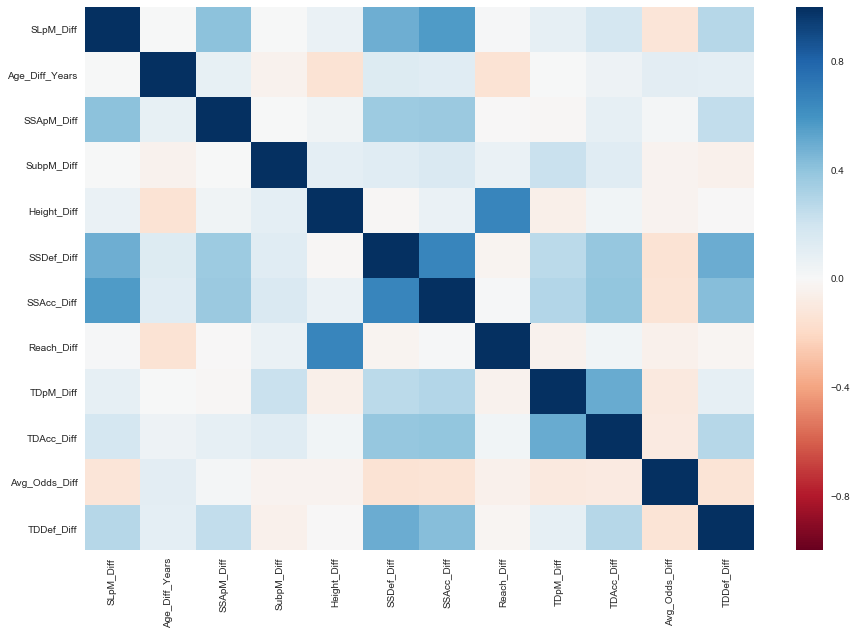

In [10]:
sns.set(style='white')
Final_df_feature_corr = Final_df_features.corr()
plt.figure(figsize=(15,10))
sns.heatmap(Final_df_feature_corr,vmin=-1, vmax=1, center=0,cmap="RdBu", xticklabels=Final_df_feature_corr.columns.values,yticklabels=Final_df_feature_corr.columns.values)

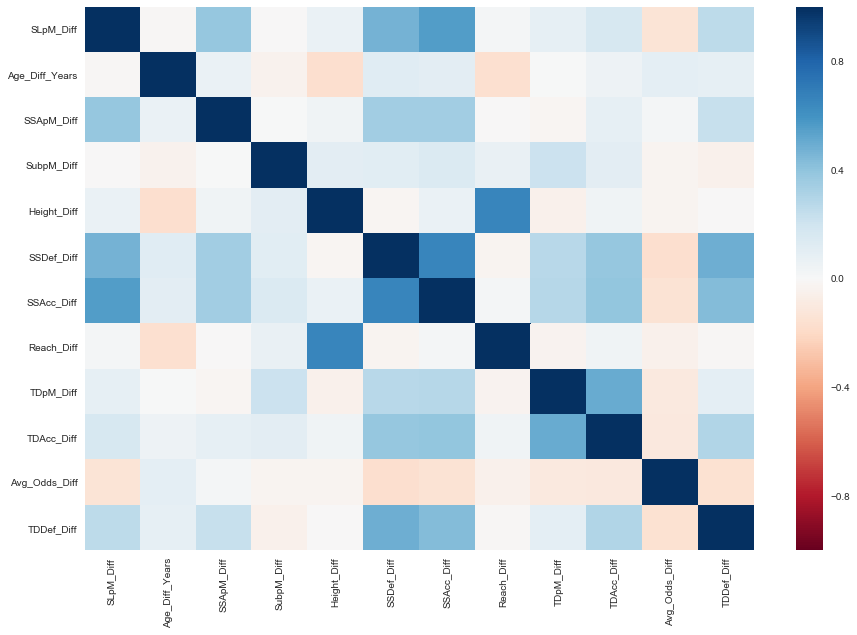

In [11]:
sns.set(style='white')
Mens_df_feature_corr = Mens_df_features.corr()
plt.figure(figsize=(15,10))
sns.heatmap(Mens_df_feature_corr,vmin=-1, vmax=1, center=0,cmap="RdBu", xticklabels=Mens_df_feature_corr.columns.values,yticklabels=Mens_df_feature_corr.columns.values)

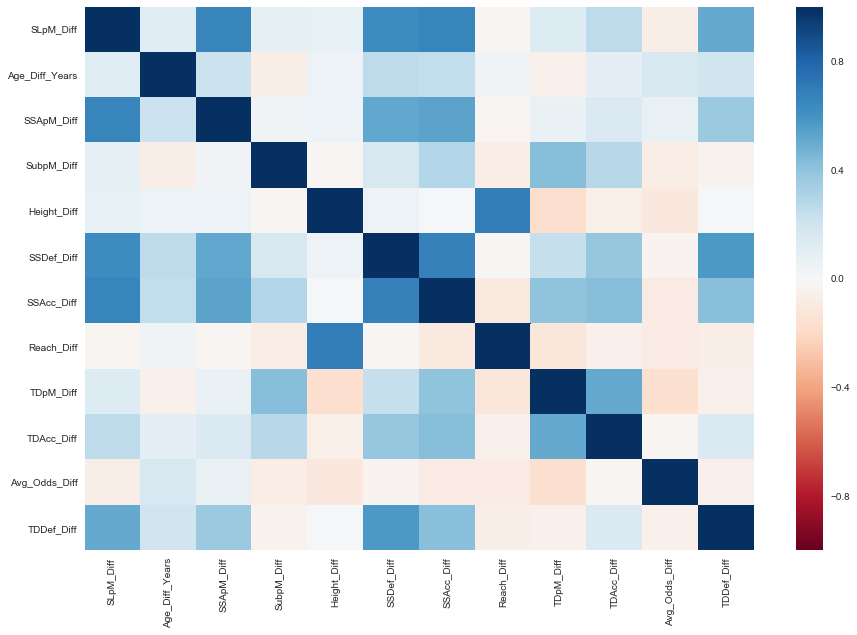

In [12]:
sns.set(style='white')
Womens_df_feature_corr = Womens_df_features.corr()
plt.figure(figsize=(15,10))
sns.heatmap(Womens_df_feature_corr,vmin=-1, vmax=1, center=0,cmap="RdBu", xticklabels=Womens_df_feature_corr.columns.values,yticklabels=Womens_df_feature_corr.columns.values)

In [13]:
Final_df_feature_corr

,SLpM_Diff,Age_Diff_Years,SSApM_Diff,SubpM_Diff,Height_Diff,SSDef_Diff,SSAcc_Diff,Reach_Diff,TDpM_Diff,TDAcc_Diff,Avg_Odds_Diff,TDDef_Diff
SLpM_Diff,1.000000,0.000946,0.410097,0.000482,0.066251,0.487878,0.567768,0.015477,0.093732,0.179597,-0.131024,0.285370
Age_Diff_Years,0.000946,1.000000,0.079195,-0.046605,-0.147011,0.137097,0.118692,-0.142538,0.001661,0.051944,0.106025,0.098034
SSApM_Diff,0.410097,0.079195,1.000000,0.004936,0.042206,0.362749,0.370220,-0.006068,-0.008569,0.093484,0.023237,0.246078
SubpM_Diff,0.000482,-0.046605,0.004936,1.000000,0.097077,0.117690,0.154892,0.067118,0.225439,0.119487,-0.032081,-0.052712
Height_Diff,0.066251,-0.147011,0.042206,0.097077,1.000000,-0.010981,0.063622,0.659806,-0.059642,0.033561,-0.032732,-0.001644
SSDef_Diff,0.487878,0.137097,0.362749,0.117690,-0.010981,1.000000,0.663735,-0.025577,0.270849,0.385128,-0.147674,0.497292
SSAcc_Diff,0.567768,0.118692,0.370220,0.154892,0.063622,0.663735,1.000000,0.012142,0.291282,0.397118,-0.139153,0.429543
Reach_Diff,0.015477,-0.142538,-0.006068,0.067118,0.659806,-0.025577,0.012142,1.000000,-0.042349,0.032268,-0.053042,-0.016176
TDpM_Diff,0.093732,0.001661,-0.008569,0.225439,-0.059642,0.270849,0.291282,-0.042349,1.000000,0.505526,-0.101469,0.088014
TDAcc_Diff,0.179597,0.051944,0.093484,0.119487,0.033561,0.385128,0.397118,0.032268,0.505526,1.000000,-0.093510,0.284215


In [14]:
Mens_df_feature_corr

,SLpM_Diff,Age_Diff_Years,SSApM_Diff,SubpM_Diff,Height_Diff,SSDef_Diff,SSAcc_Diff,Reach_Diff,TDpM_Diff,TDAcc_Diff,Avg_Odds_Diff,TDDef_Diff
SLpM_Diff,1.000000,-0.009250,0.383823,-0.005857,0.064697,0.474546,0.559494,0.018324,0.090627,0.171365,-0.138090,0.264892
Age_Diff_Years,-0.009250,1.000000,0.064012,-0.045060,-0.165273,0.124857,0.106517,-0.157967,0.005769,0.047854,0.099542,0.088392
SSApM_Diff,0.383823,0.064012,1.000000,0.001746,0.040436,0.343960,0.350883,-0.004237,-0.015710,0.086986,0.016519,0.231372
SubpM_Diff,-0.005857,-0.045060,0.001746,1.000000,0.105862,0.114226,0.144474,0.076499,0.213009,0.107156,-0.028299,-0.054175
Height_Diff,0.064697,-0.165273,0.040436,0.105862,1.000000,-0.018007,0.069025,0.657638,-0.051275,0.042506,-0.024107,-0.002955
SSDef_Diff,0.474546,0.124857,0.343960,0.114226,-0.018007,1.000000,0.662363,-0.027025,0.274671,0.385373,-0.164295,0.489151
SSAcc_Diff,0.559494,0.106517,0.350883,0.144474,0.069025,0.662363,1.000000,0.022174,0.282536,0.393728,-0.146312,0.431176
Reach_Diff,0.018324,-0.157967,-0.004237,0.076499,0.657638,-0.027025,0.022174,1.000000,-0.036268,0.040960,-0.050886,-0.011771
TDpM_Diff,0.090627,0.005769,-0.015710,0.213009,-0.051275,0.274671,0.282536,-0.036268,1.000000,0.506214,-0.096392,0.099632
TDAcc_Diff,0.171365,0.047854,0.086986,0.107156,0.042506,0.385373,0.393728,0.040960,0.506214,1.000000,-0.101823,0.299499


In [15]:
Womens_df_feature_corr

,SLpM_Diff,Age_Diff_Years,SSApM_Diff,SubpM_Diff,Height_Diff,SSDef_Diff,SSAcc_Diff,Reach_Diff,TDpM_Diff,TDAcc_Diff,Avg_Odds_Diff,TDDef_Diff
SLpM_Diff,1.000000,0.119124,0.663693,0.089782,0.083021,0.631888,0.657938,-0.016335,0.133315,0.262050,-0.069784,0.509190
Age_Diff_Years,0.119124,1.000000,0.218655,-0.068828,0.055544,0.260217,0.245624,0.043952,-0.050845,0.095082,0.164805,0.199708
SSApM_Diff,0.663693,0.218655,1.000000,0.040765,0.058441,0.516959,0.534033,-0.023093,0.064544,0.145254,0.071506,0.374097
SubpM_Diff,0.089782,-0.068828,0.040765,1.000000,-0.021288,0.167580,0.294356,-0.072340,0.424696,0.277540,-0.074652,-0.035006
Height_Diff,0.083021,0.055544,0.058441,-0.021288,1.000000,0.059081,0.008276,0.691890,-0.168038,-0.056379,-0.105947,0.012478
SSDef_Diff,0.631888,0.260217,0.516959,0.167580,0.059081,1.000000,0.678443,-0.013383,0.237506,0.388960,-0.024173,0.574002
SSAcc_Diff,0.657938,0.245624,0.534033,0.294356,0.008276,0.678443,1.000000,-0.098642,0.401606,0.428335,-0.082578,0.414621
Reach_Diff,-0.016335,0.043952,-0.023093,-0.072340,0.691890,-0.013383,-0.098642,1.000000,-0.124518,-0.054646,-0.082005,-0.068698
TDpM_Diff,0.133315,-0.050845,0.064544,0.424696,-0.168038,0.237506,0.401606,-0.124518,1.000000,0.511501,-0.156545,-0.050156
TDAcc_Diff,0.262050,0.095082,0.145254,0.277540,-0.056379,0.388960,0.428335,-0.054646,0.511501,1.000000,-0.023392,0.144425


In [16]:
Final_df_features
Mens_df_features
Womens_df_features

,SLpM_Diff,Age_Diff_Years,SSApM_Diff,SubpM_Diff,Height_Diff,SSDef_Diff,SSAcc_Diff,Reach_Diff,TDpM_Diff,TDAcc_Diff,Avg_Odds_Diff,TDDef_Diff
8,1.648069,-3.169863,3.708155,0.000000,4,0.333333,0.438356,0.0,0.000000,0.000000,-3.088824,0.500000
9,1.379735,6.079452,1.865131,-0.265291,2,0.205891,-0.195256,6.0,0.000000,0.000000,-0.916561,-0.066667
20,2.049435,-9.378082,-1.765217,0.108872,4,-0.020133,-0.023769,7.0,-0.039982,-0.272727,-3.052130,0.378947
25,3.646962,-5.835616,0.935959,0.007932,4,0.123443,0.022945,3.0,-0.215566,0.137500,-0.674123,0.165775
27,5.837104,0.002740,6.255656,0.011312,4,0.611384,0.394797,3.0,0.022624,0.500000,-3.976277,0.933333
31,5.725003,7.852055,5.239714,0.007033,1,0.655252,0.506849,3.0,0.028133,0.363636,-0.033723,0.729167
34,0.095168,-1.849315,-0.912492,0.000000,-1,-0.003901,-0.064911,3.0,0.127531,0.324176,-1.984343,-0.257143
53,-0.768876,-3.139726,-2.030262,0.003965,0,0.215157,0.074849,4.0,-0.032548,-0.171429,-1.528087,0.052174
55,-1.780204,-6.895890,-3.460717,-0.071208,-3,-0.433566,-0.386997,-5.0,-0.071208,-0.238095,-0.635433,-0.384615
61,1.059041,-2.117808,2.959649,-0.028677,-3,-0.107130,0.042945,-1.0,0.096147,0.275641,-1.012658,-0.238095


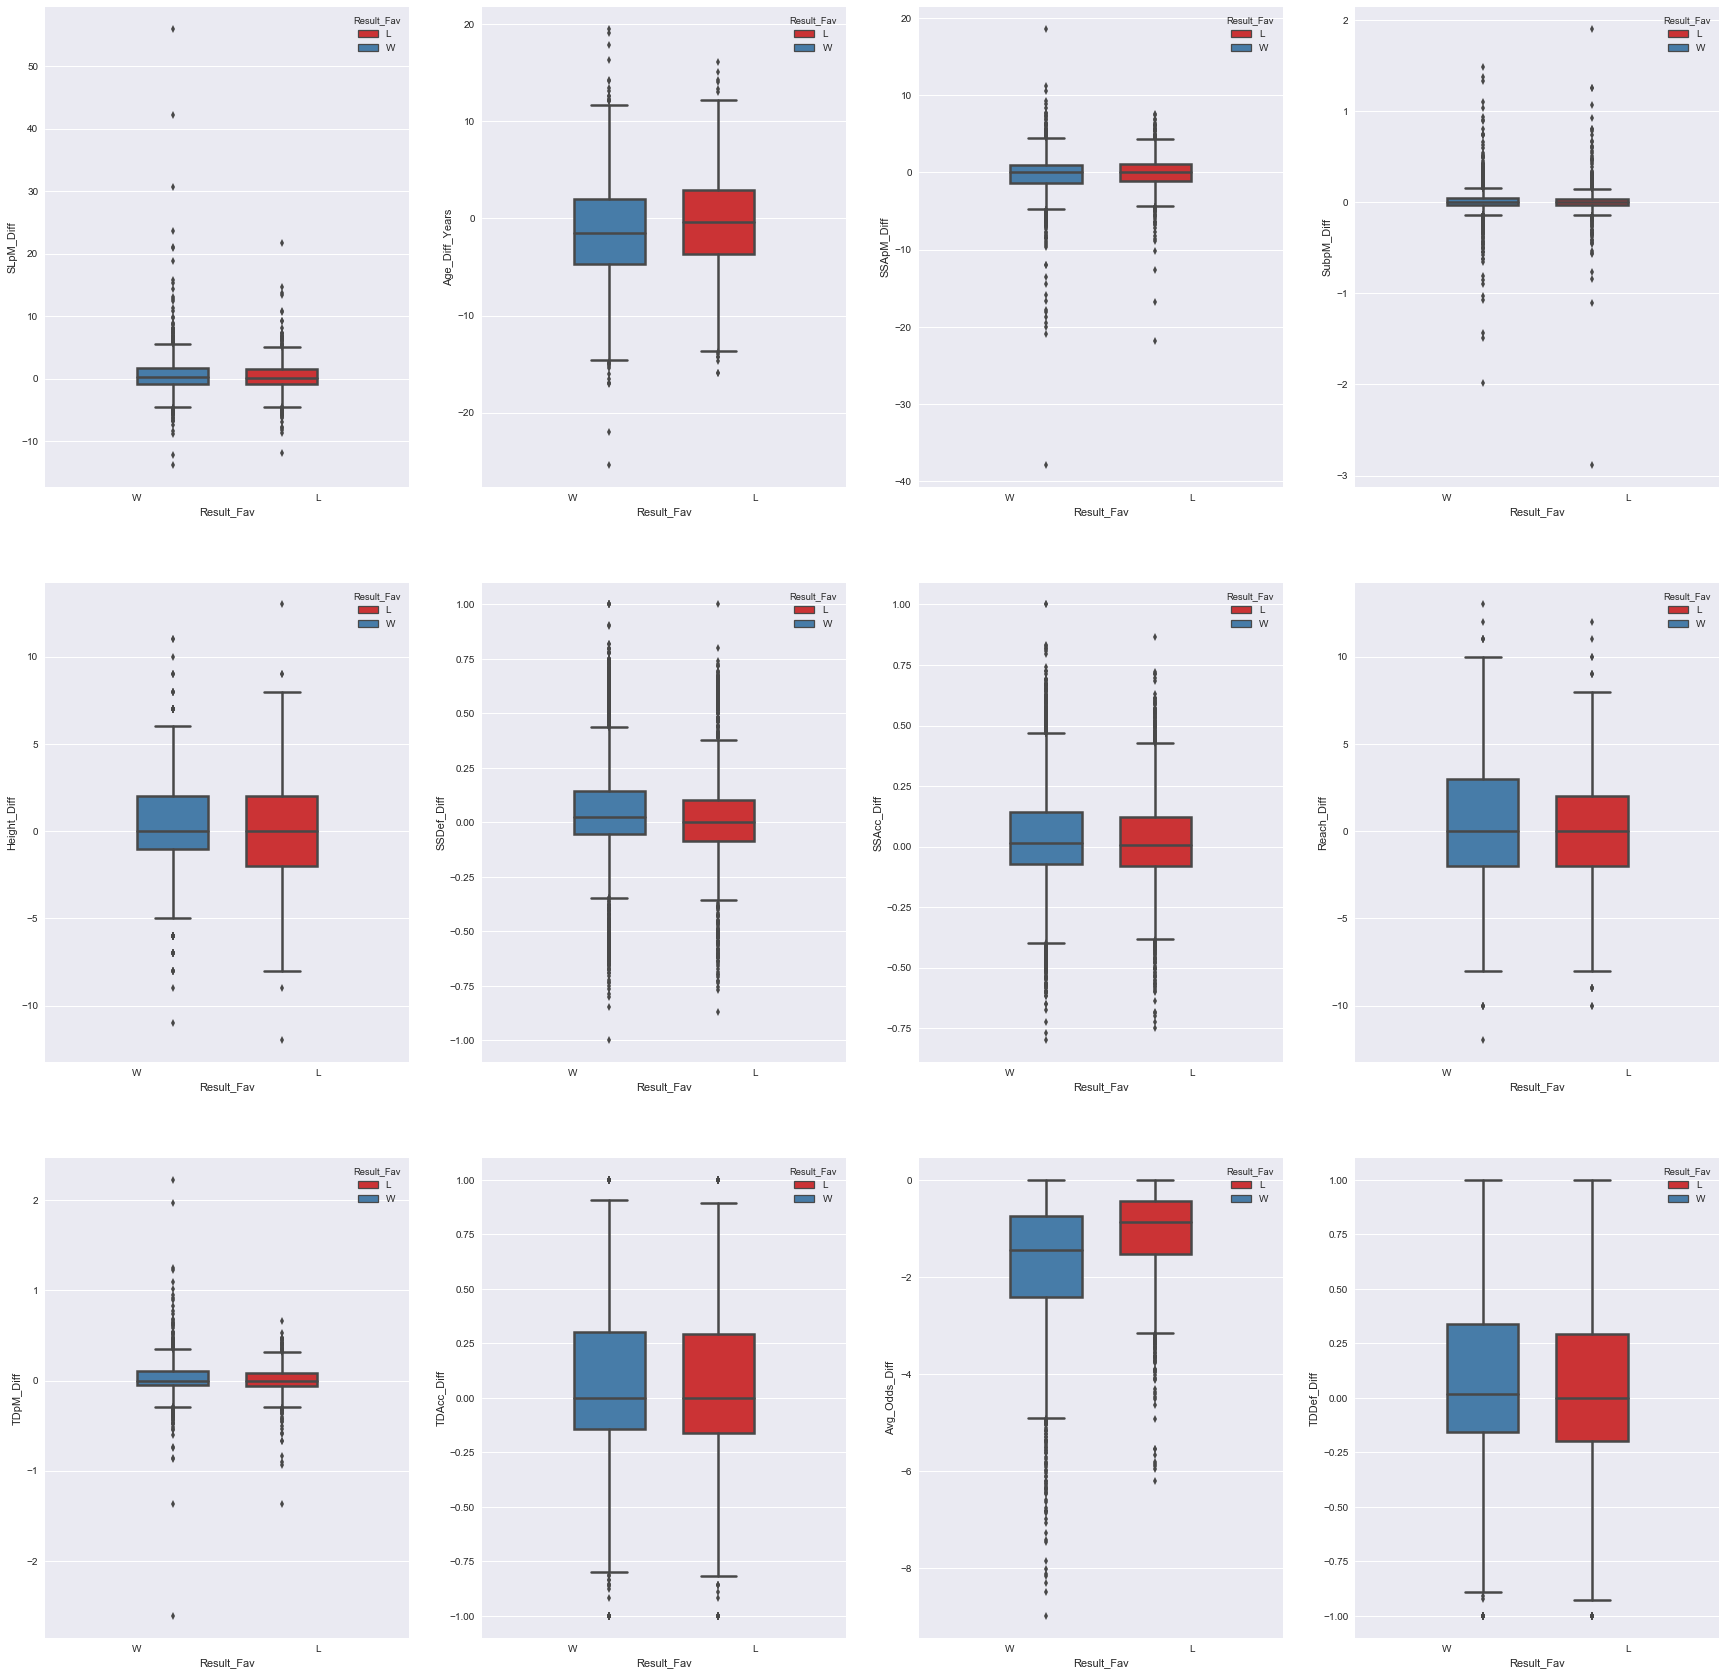

In [19]:
sns.set_style("darkgrid")
sns.set_palette("Set1")
fig, ax = plt.subplots(3,4, figsize=(30,30))
for index, feature in enumerate(Final_df_features):
    x = index // 4
    y = index % 4
    sns.boxplot( x="Result_Fav", y=feature ,hue="Result_Fav",hue_order=['L', 'W'], data=Final_df,ax=ax[x,y],linewidth=2.5, order=["W", "L"])

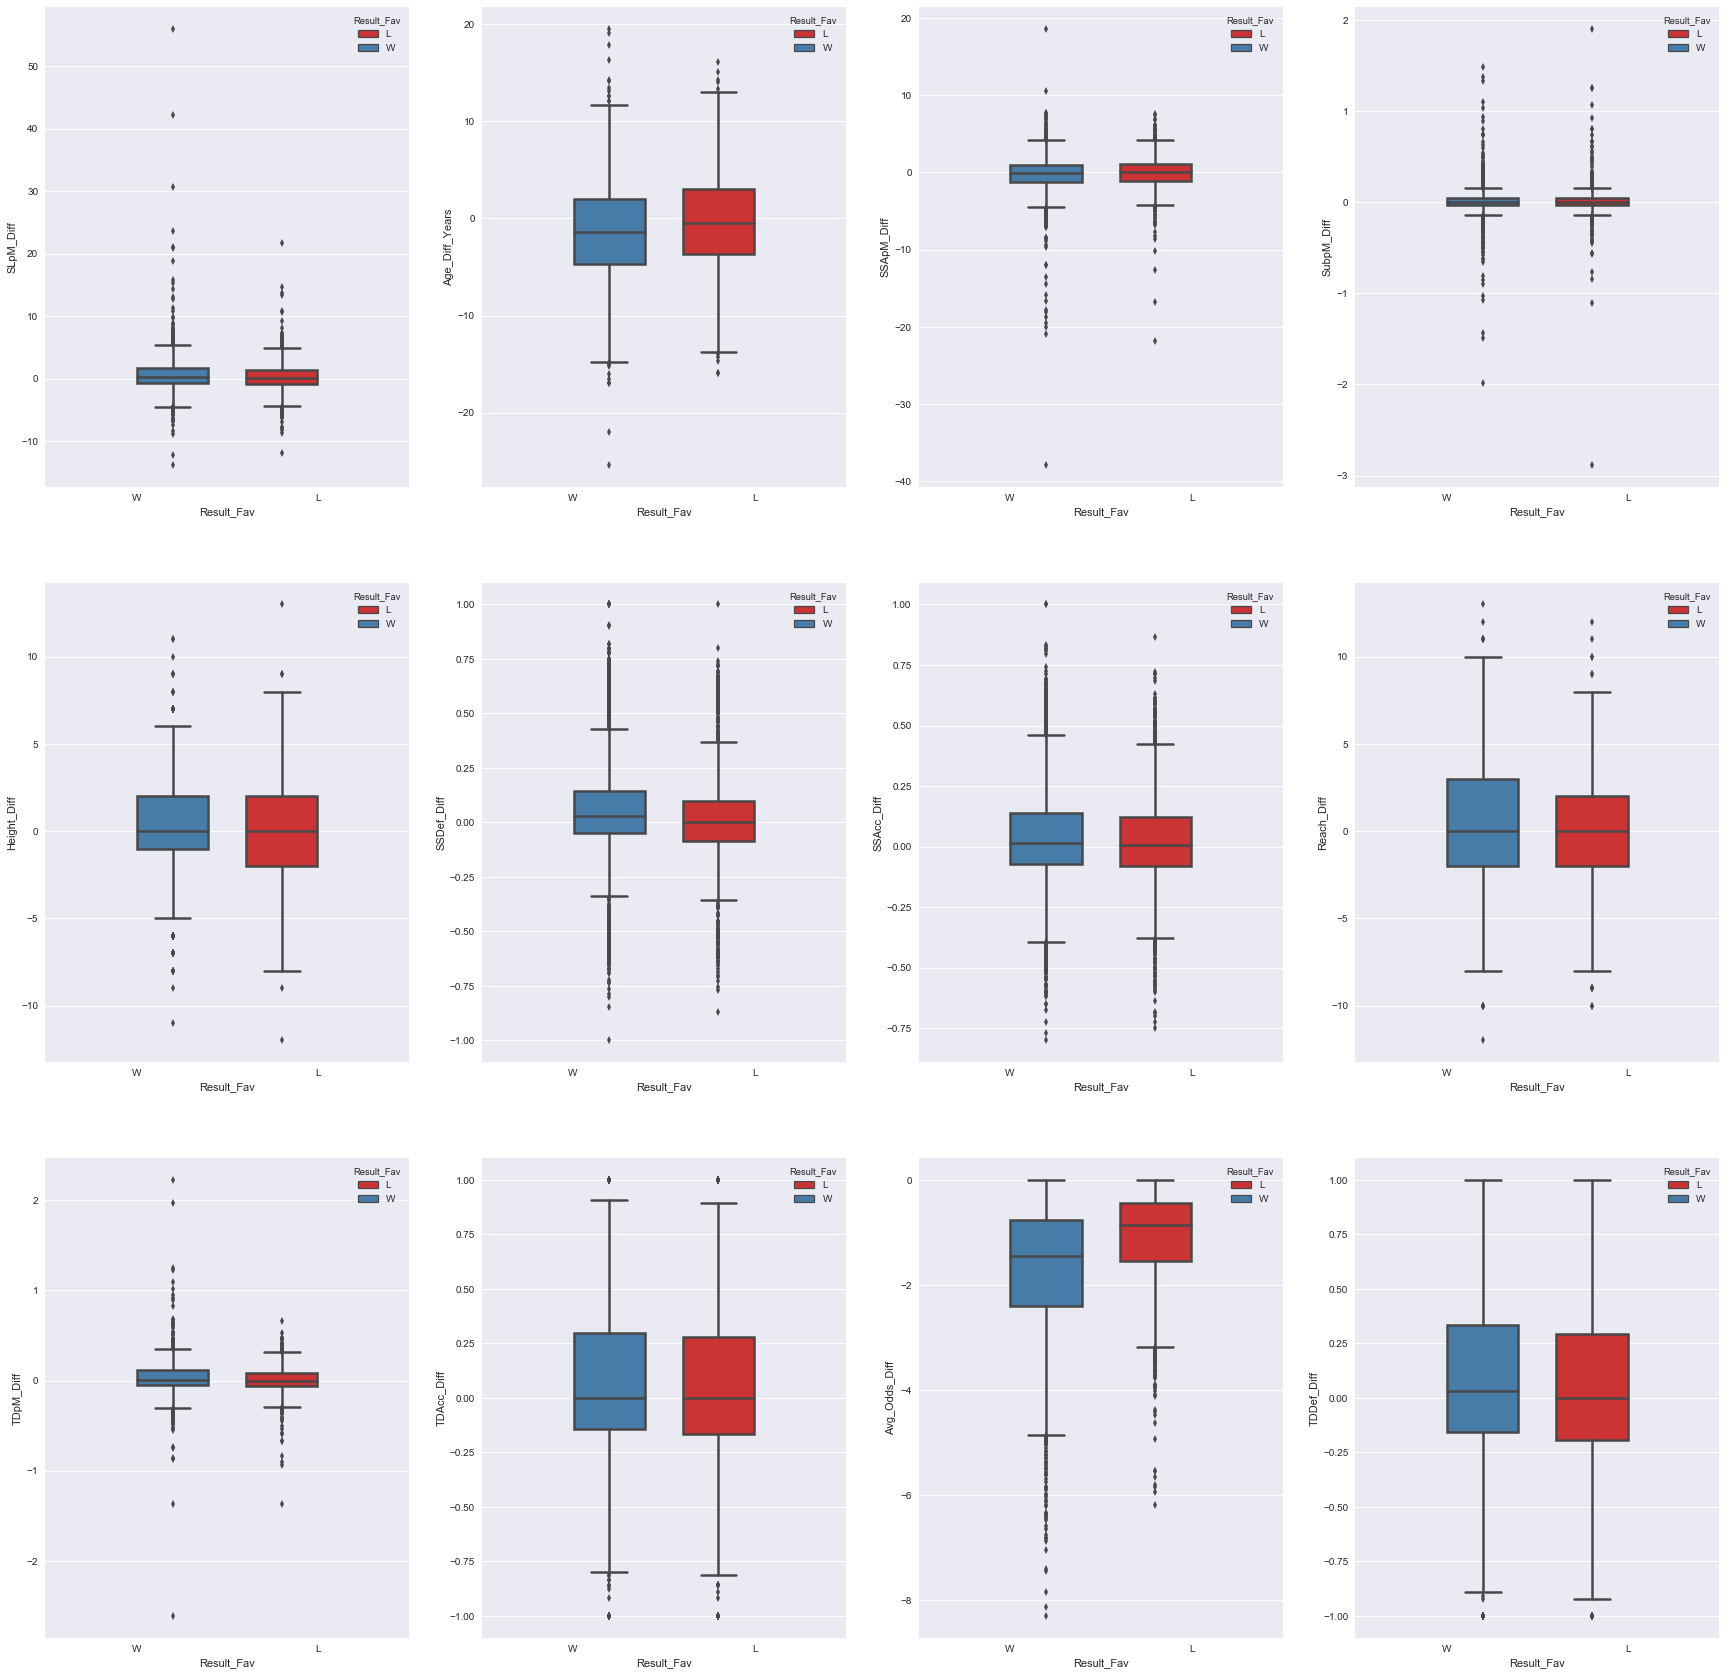

In [20]:
sns.set_style("darkgrid")
sns.set_palette("Set1")
fig, ax = plt.subplots(3,4, figsize=(30,30))
for index, feature in enumerate(Mens_df_features):
    x = index // 4
    y = index % 4
    sns.boxplot( x="Result_Fav", y=feature ,hue="Result_Fav",hue_order=['L', 'W'], data=Mens_df,ax=ax[x,y],linewidth=2.5, order=["W", "L"])

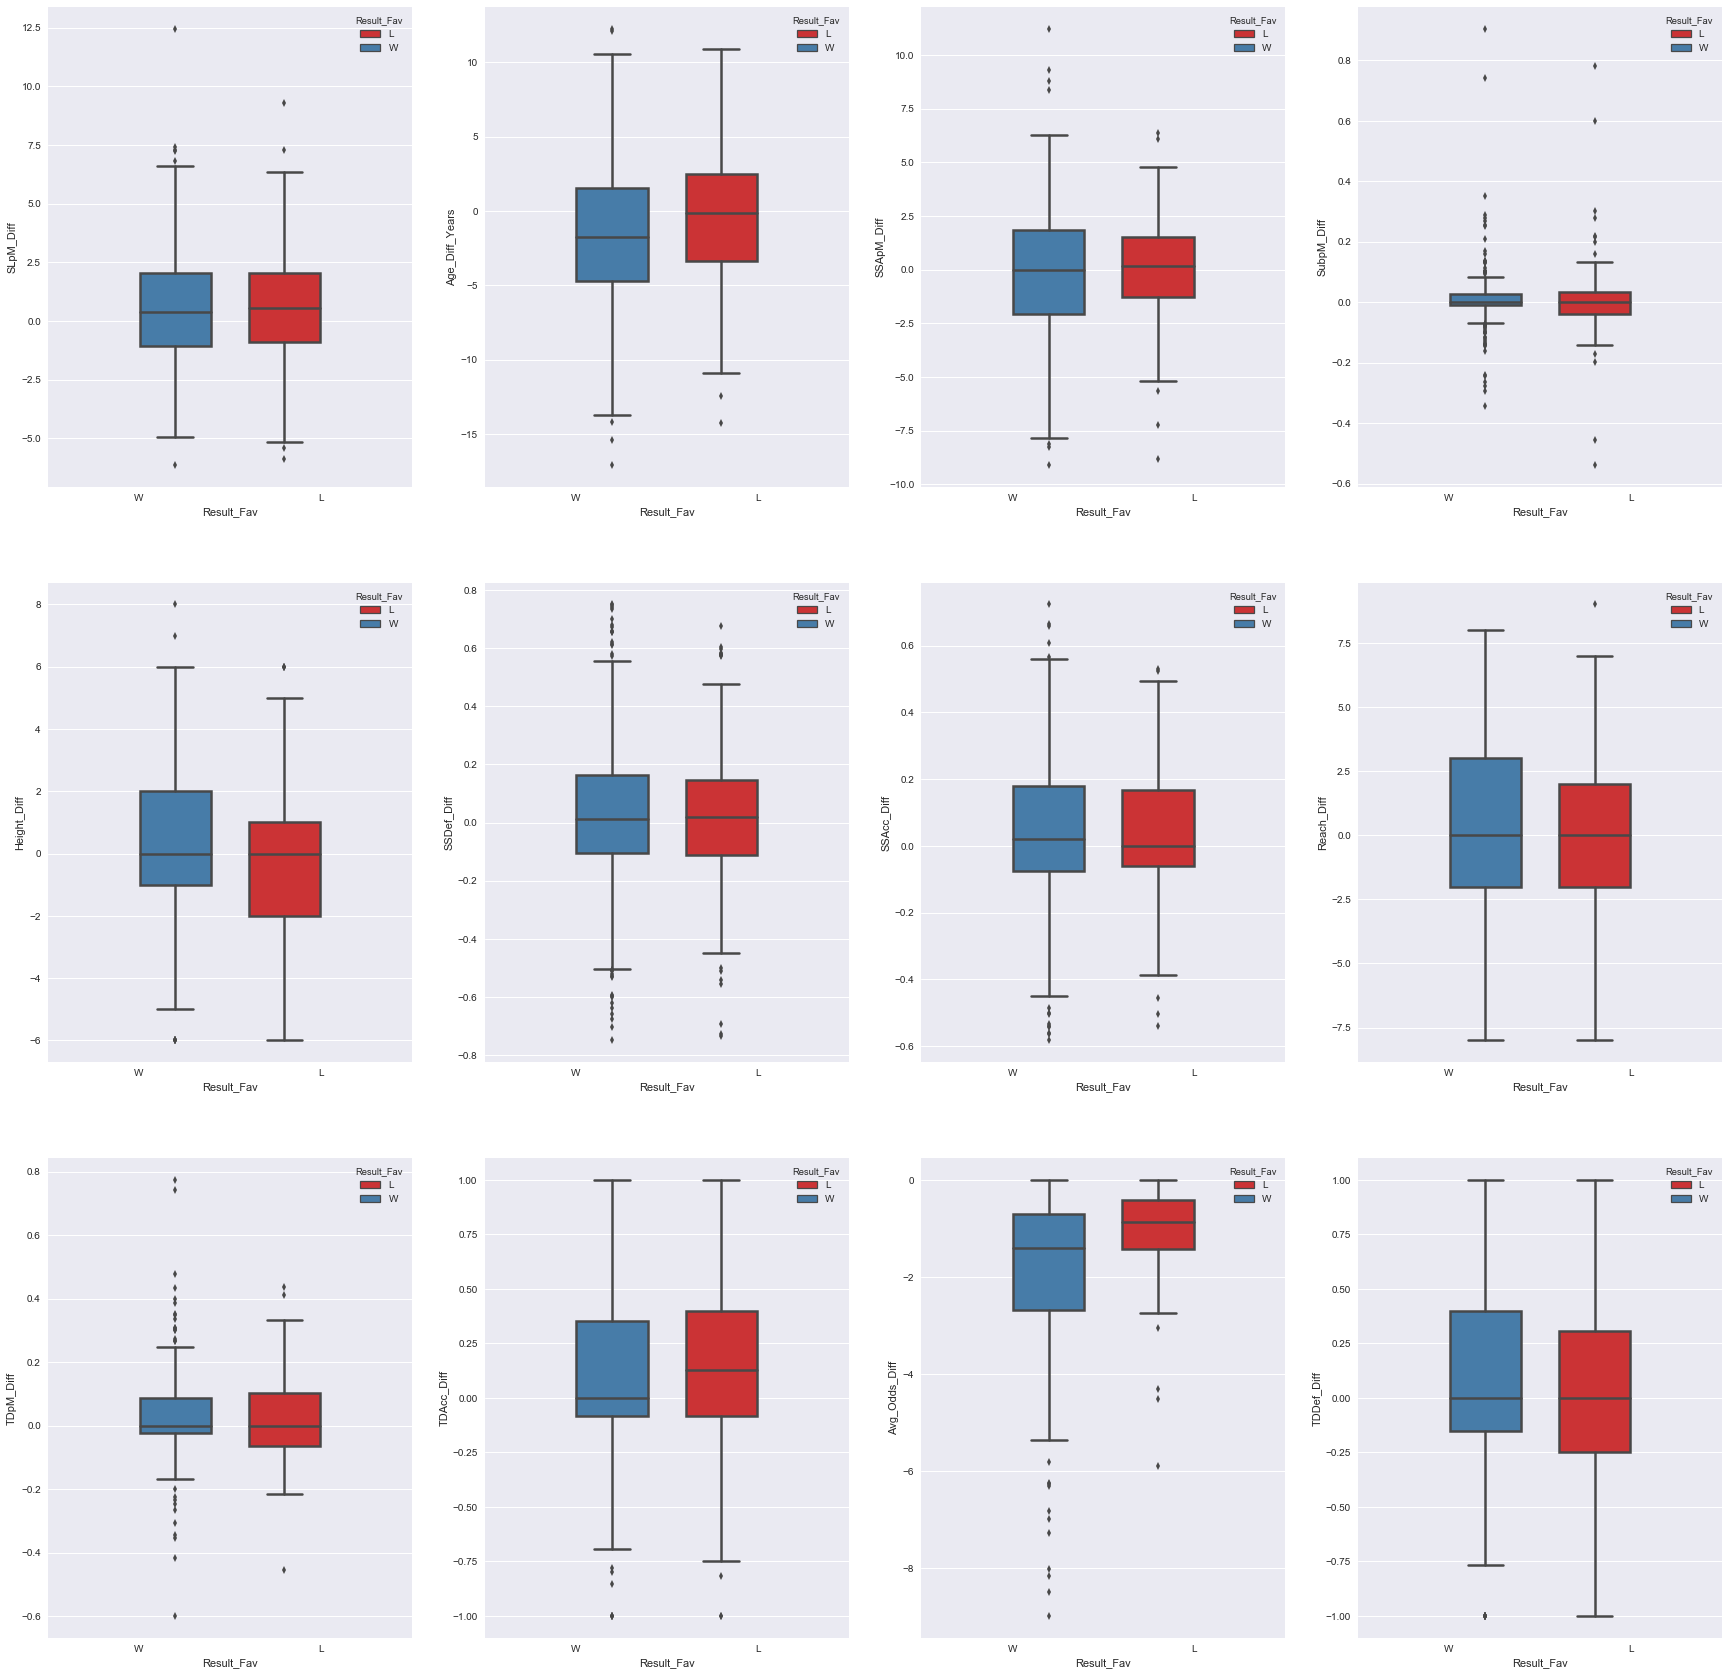

In [21]:
sns.set_style("darkgrid")
sns.set_palette("Set1")
fig, ax = plt.subplots(3,4, figsize=(30,30))
for index, feature in enumerate(Womens_df_features):
    x = index // 4
    y = index % 4
    sns.boxplot( x="Result_Fav", y=feature ,hue="Result_Fav",hue_order=['L', 'W'], data=Womens_df,ax=ax[x,y],linewidth=2.5, order=["W", "L"])

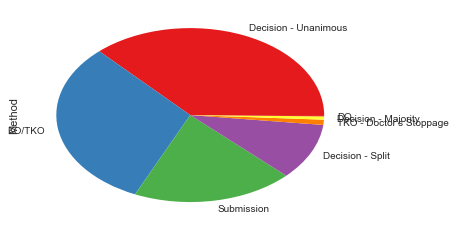

In [37]:
Final_df['Method'].value_counts().plot.pie()

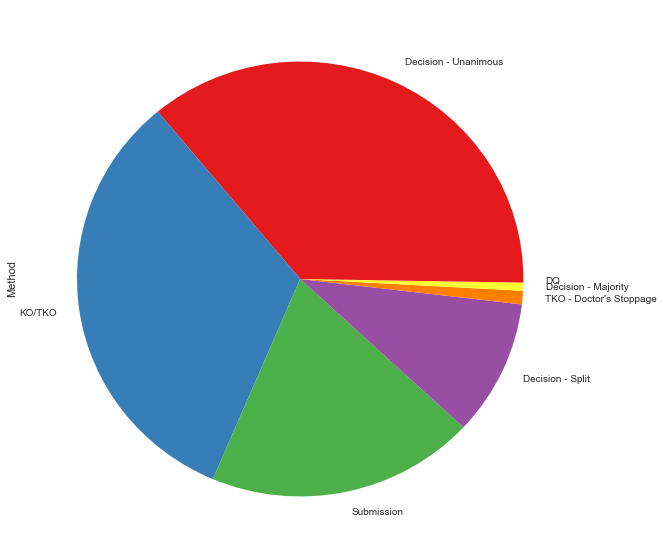

In [52]:
Mens_df['Method'].value_counts().plot.pie(figsize=(10,10),textprops={'fontsize':10} )

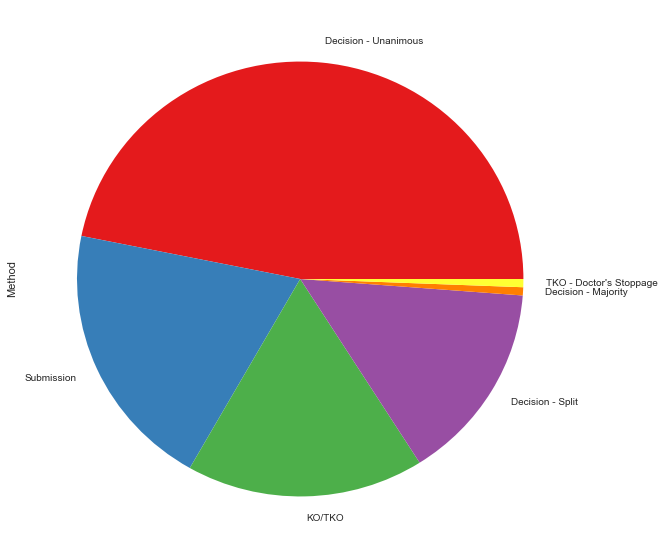

In [51]:
Womens_df['Method'].value_counts().plot.pie(figsize=(10,10),textprops={'fontsize': 10})